In [12]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/home/christoph/Technician-Vehicle-Routing-Optimization')
from alns.Problem import Problem
import alns.TVRPAlgorithms as tvrp
from alns.ALNS import ALNS
from alns.criteria import HillClimbing, SimulatedAnnealing, RecordToRecordTravel, ThresholdAcceptance

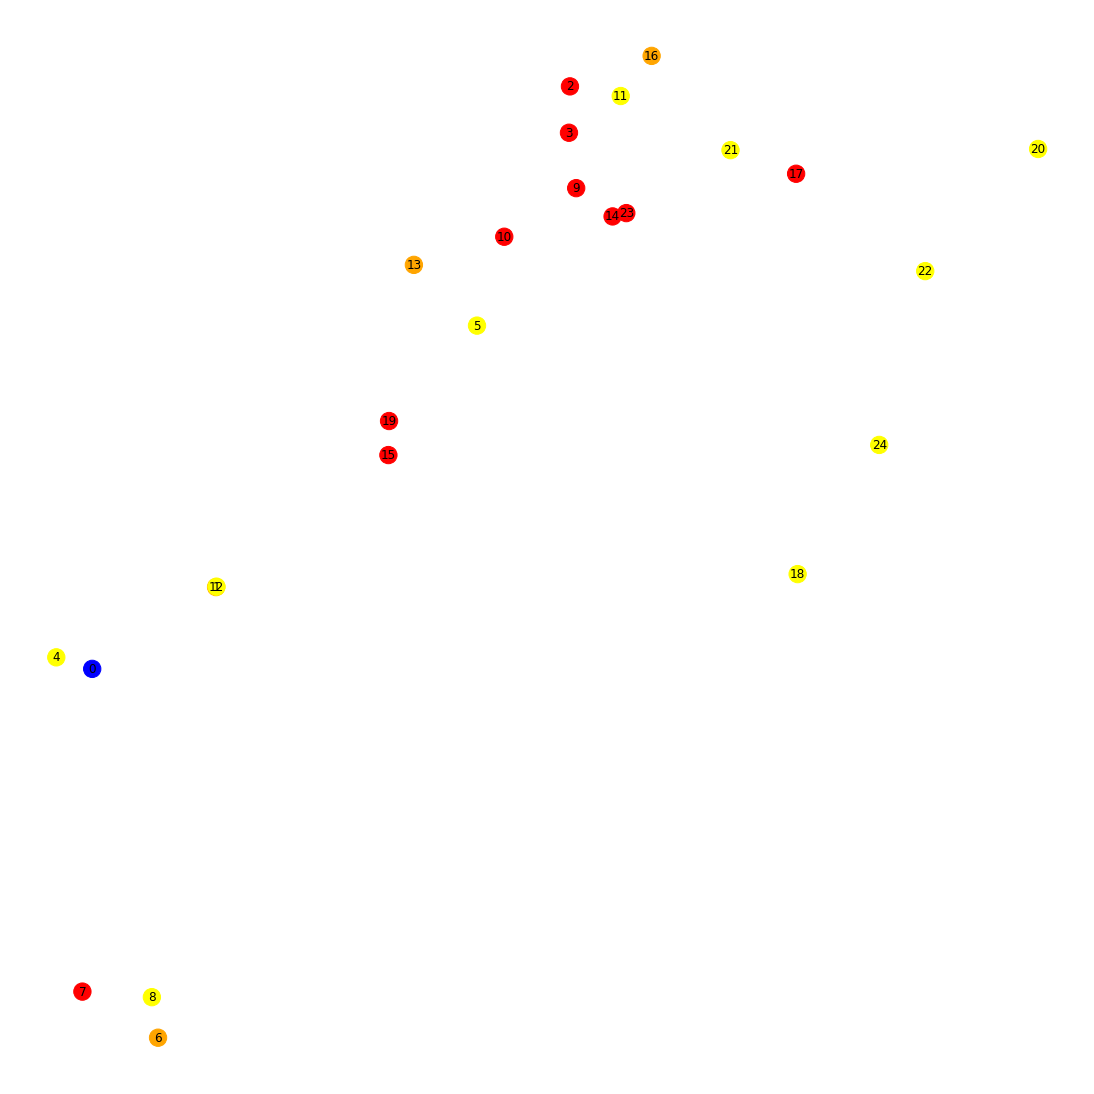

In [13]:
p = Problem("/home/christoph/Technician-Vehicle-Routing-Optimization/examples/Datasets/Data_3.csv", "/home/christoph/Technician-Vehicle-Routing-Optimization/examples/Datasets/Matrix_3.json")
plt.rcParams["figure.figsize"]=15,15
Graph = p.plot()

# Urgency Assignment via asymetric normalized tansini affinity

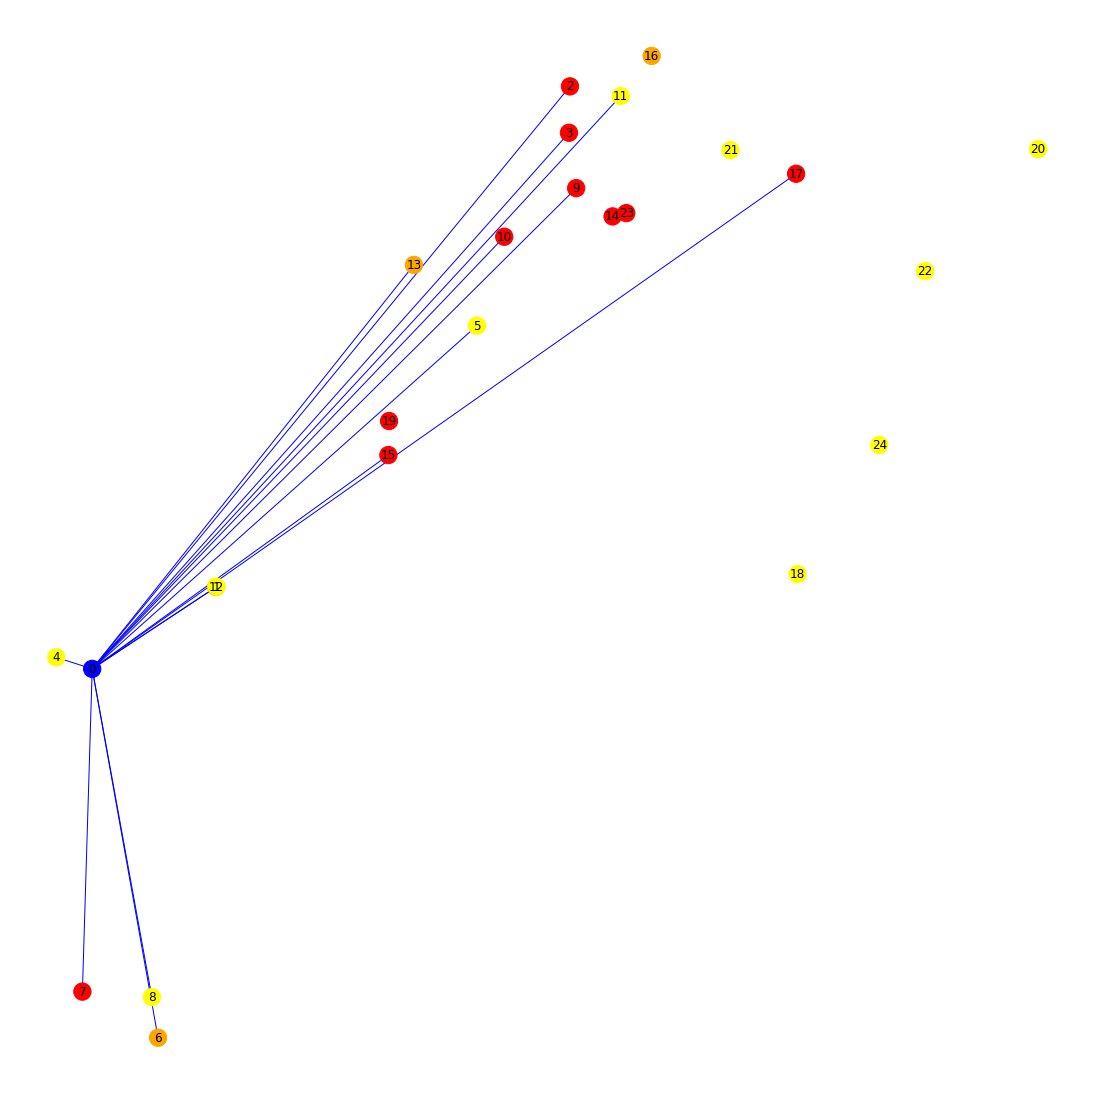

In [4]:
Graph, solution = tvrp.parallelUrgencyAssignment(p, True)

In [5]:
print("Percent custs in holding after clustering",  len(solution.unassignedRequests)/len(solution.problem.demand))

Percent custs in holding after clustering 0.375


# Parallel Generalized Regret Insertion

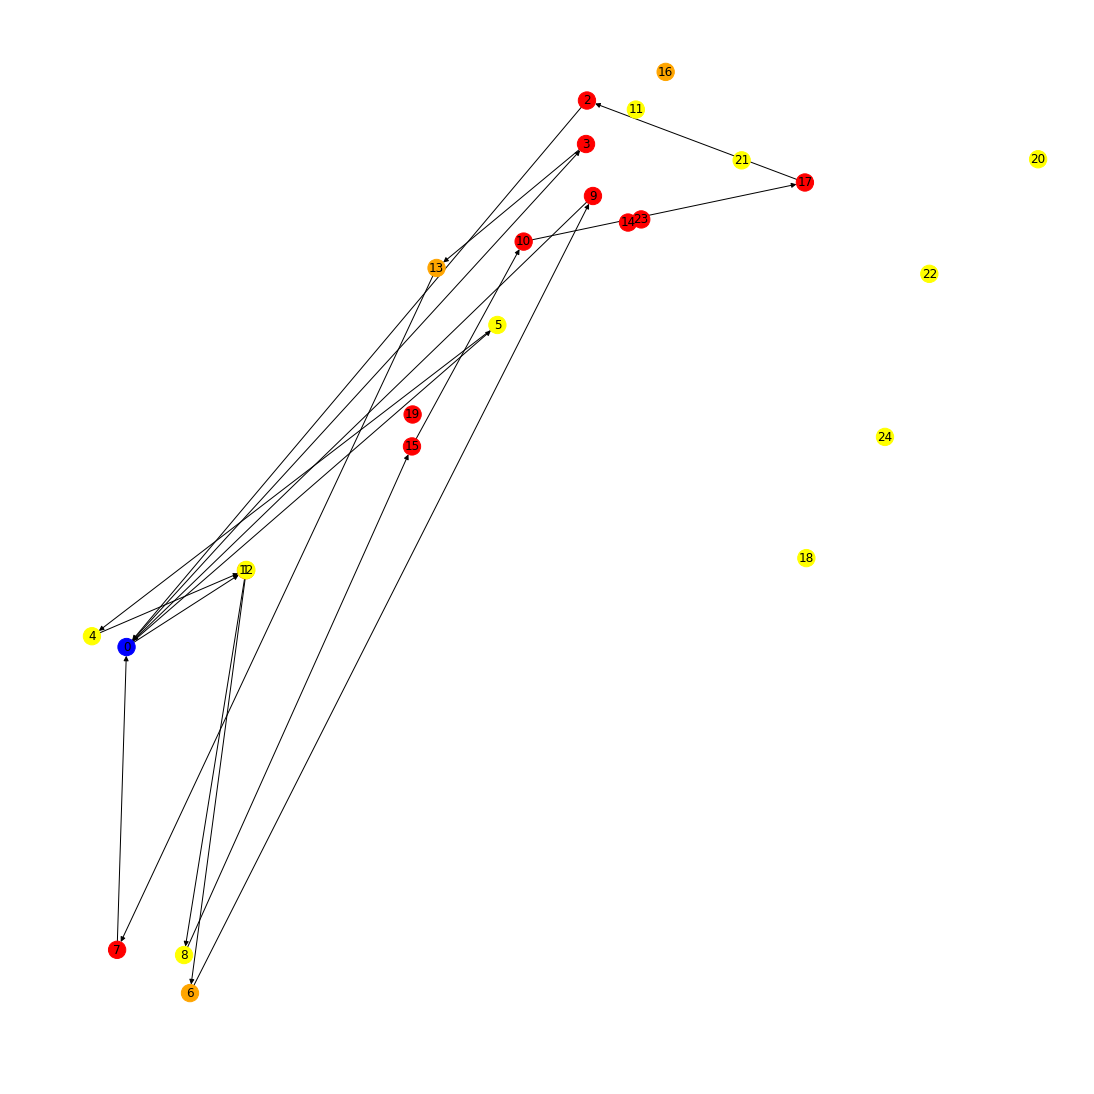

In [6]:
tvrp.buildSolutionParallelStyle(solution)
Graph = solution.toGraph()

In [7]:
print("Total objective: ", solution.objective())

print("Percent custs in holding after clustering",  len(solution.unassignedRequests)/len(p.demand))

Total objective:  5506.022669999999
Percent custs in holding after clustering 0.4166666666666667


# ALNS via Hill Climbing Acceptance

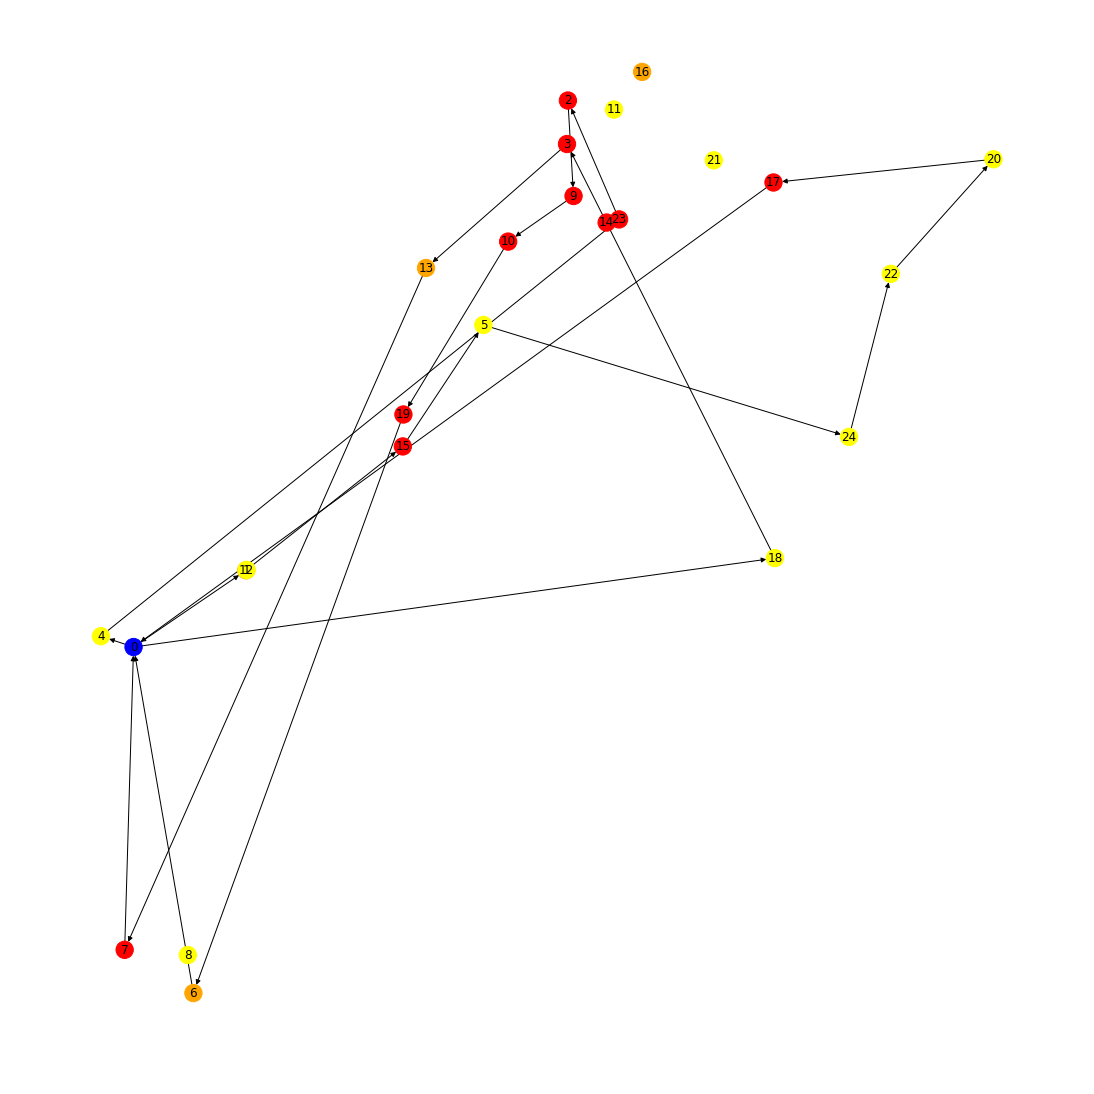

In [25]:
alns = ALNS()
alns.add_destroy_operator(tvrp.randomRemoval)
alns.add_destroy_operator(tvrp.distancedBasedWorstRemoval)
alns.add_destroy_operator(tvrp.timeBasedWorstRemoval)
alns.add_destroy_operator(tvrp.relatedRemoval)
alns.add_repair_operator(tvrp.greedyInsertion)
alns.add_repair_operator(tvrp.k_regretInsertion)
criterion = HillClimbing()

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=1000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()


In [8]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  1415.6827899999998
Percent custs in holding after alns 0.20833333333333334


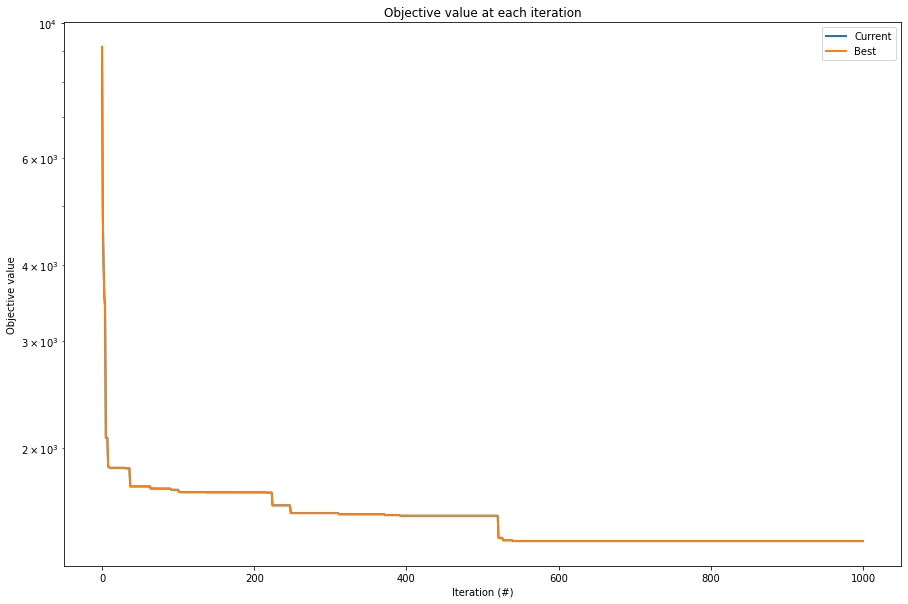

In [28]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

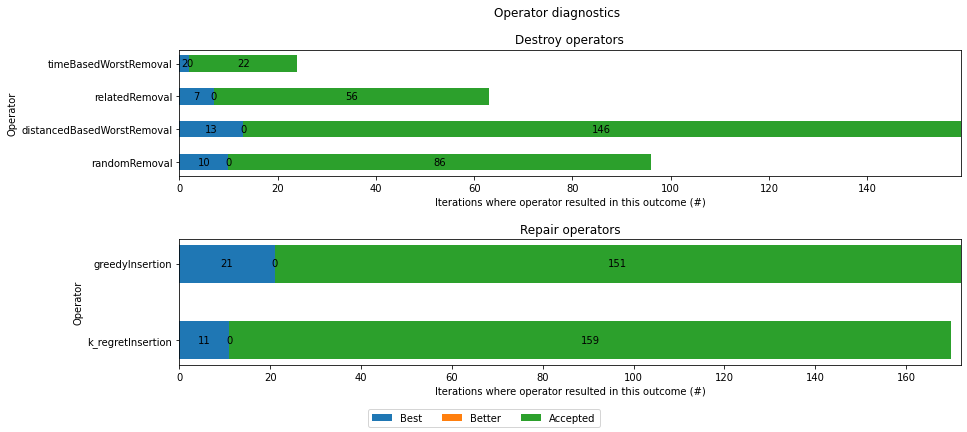

In [29]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])

 # ALNS via Simulated Annealing Acceptance

In [ ]:
alns = ALNS()
alns.add_destroy_operator(tvrp.randomRemoval)
alns.add_destroy_operator(tvrp.distancedBasedWorstRemoval)
alns.add_destroy_operator(tvrp.timeBasedWorstRemoval)
alns.add_destroy_operator(tvrp.relatedRemoval)
alns.add_repair_operator(tvrp.greedyInsertion)
alns.add_repair_operator(tvrp.k_regretInsertion)
criterion = SimulatedAnnealing(1000, 0.0001, 0.95, method = "exponential")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=1500, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

/home/christoph/Technician-Vehicle-Routing-Optimization/alns/criteria/SimulatedAnnealing.py:99: RuntimeWarning: overflow encountered in exp
  probability = np.exp((current.objective() - candidate.objective())


Total objective:  1403.9615000000001
Percent custs in holding after alns 0.20833333333333334


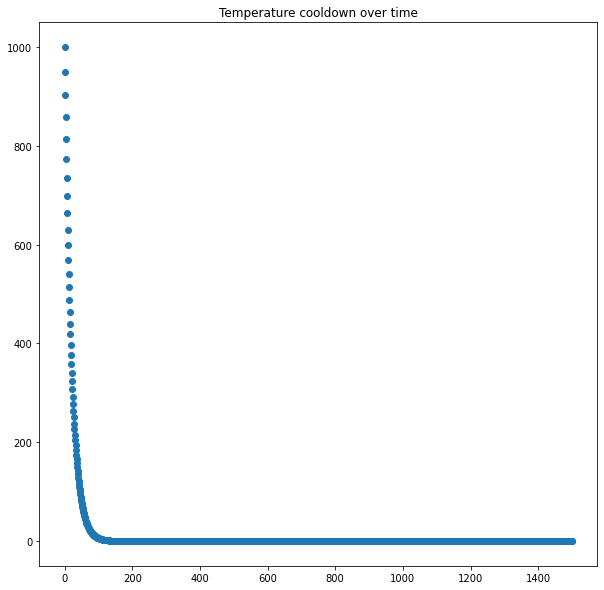

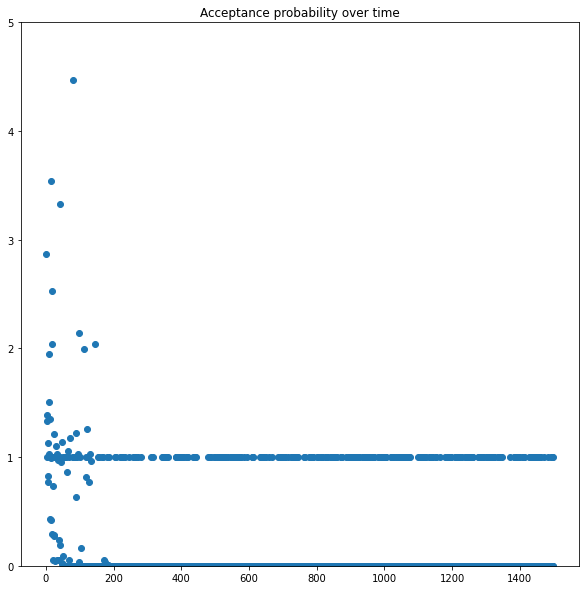

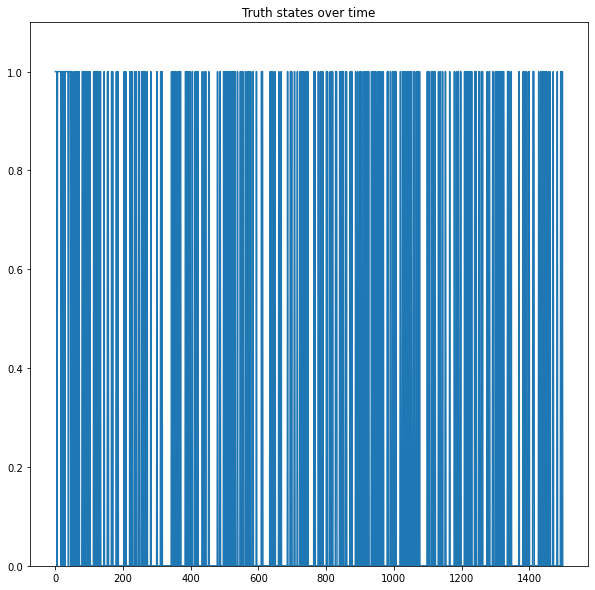

In [22]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))
criterion.plotAnalytics()

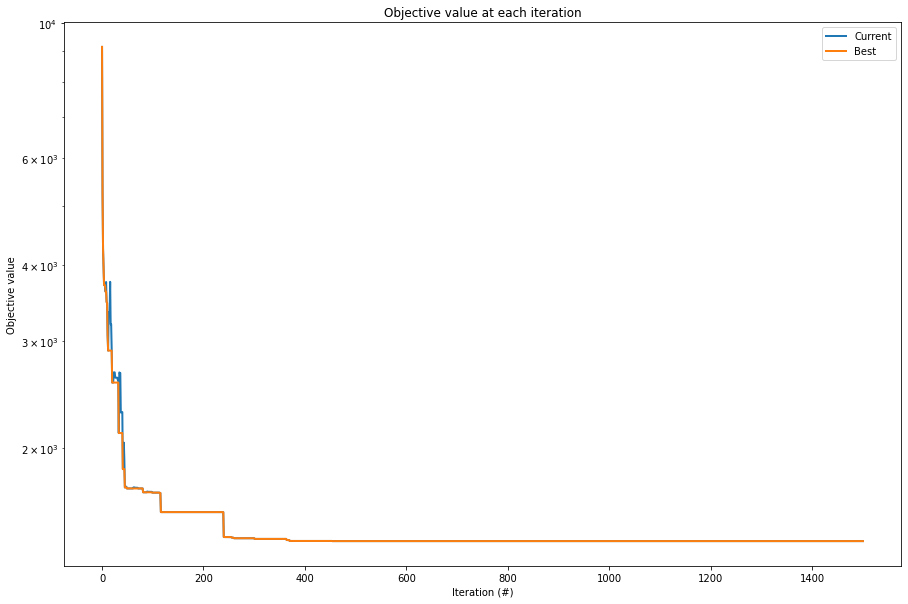

In [23]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

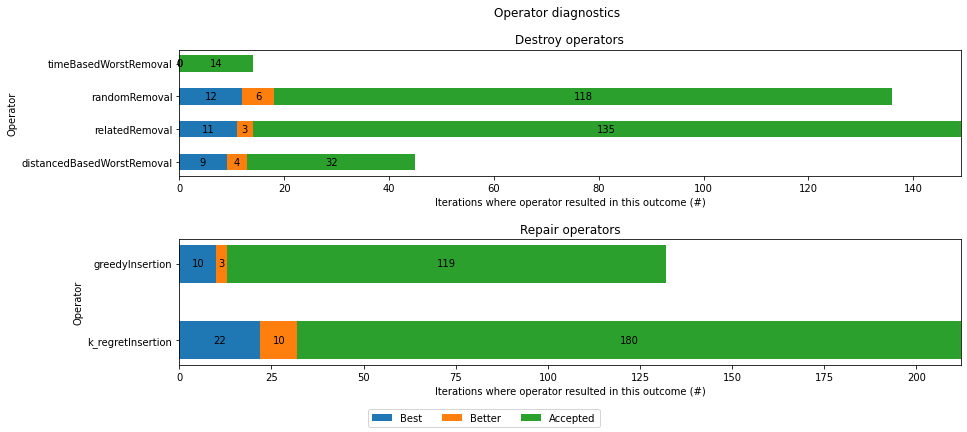

In [24]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])

 # ALNS via Record to Record Travel Acceptance

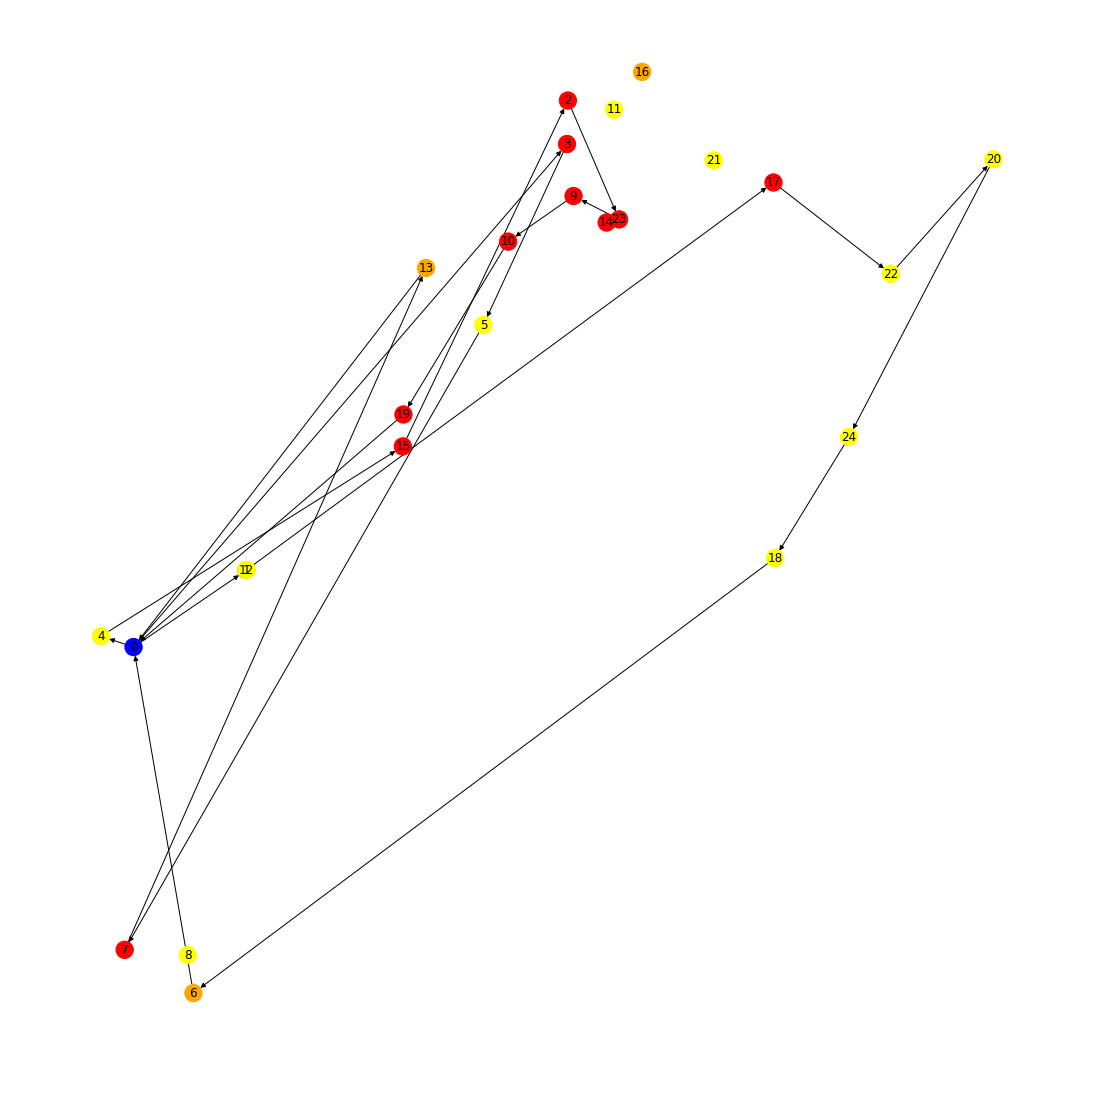

In [63]:
alns = ALNS()
alns.add_destroy_operator(tvrp.randomRemoval)
alns.add_destroy_operator(tvrp.distancedBasedWorstRemoval)
alns.add_destroy_operator(tvrp.timeBasedWorstRemoval)
alns.add_destroy_operator(tvrp.relatedRemoval)
alns.add_repair_operator(tvrp.greedyInsertion)
alns.add_repair_operator(tvrp.k_regretInsertion)
criterion = RecordToRecordTravel(0.2, 0.00000000000001, 0.0002, method = "linear")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=1000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

In [57]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  1406.5774600000002
Percent custs in holding after alns 0.20833333333333334


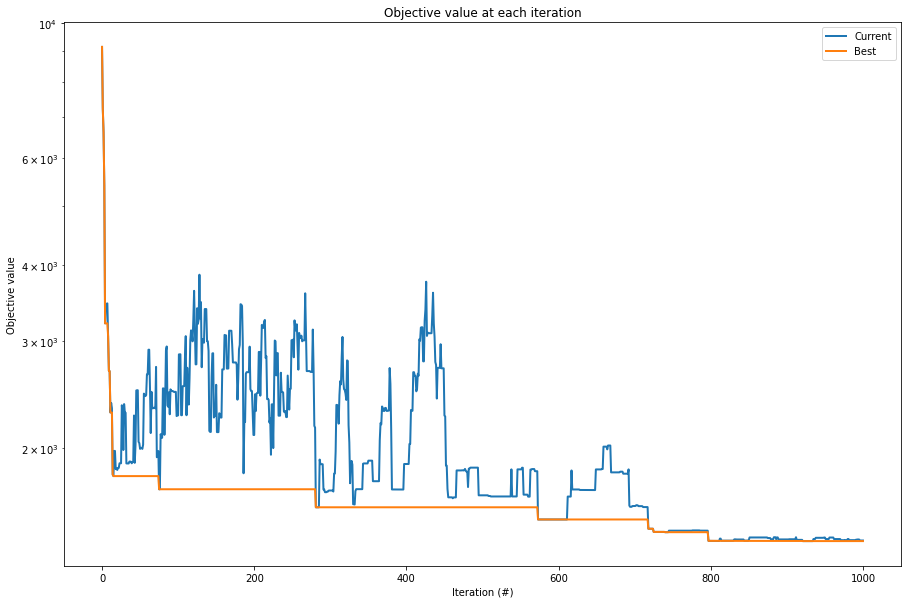

In [58]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

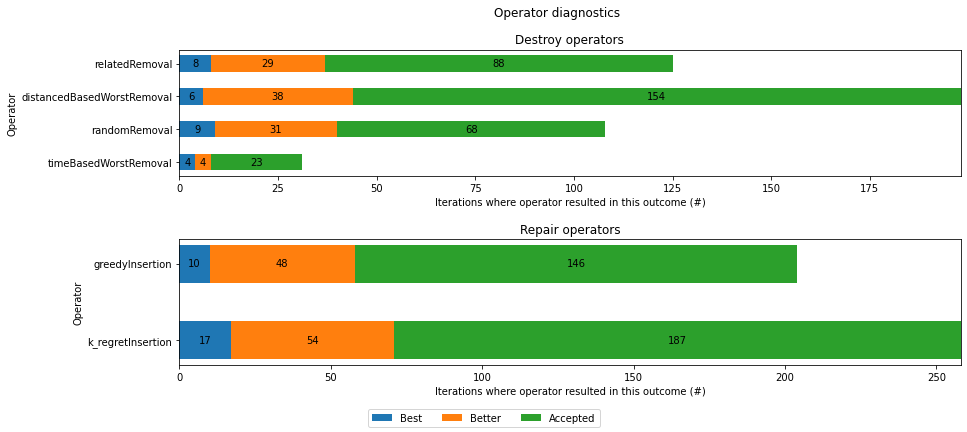

In [55]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])

 # ALNS via Threshold Acceptance

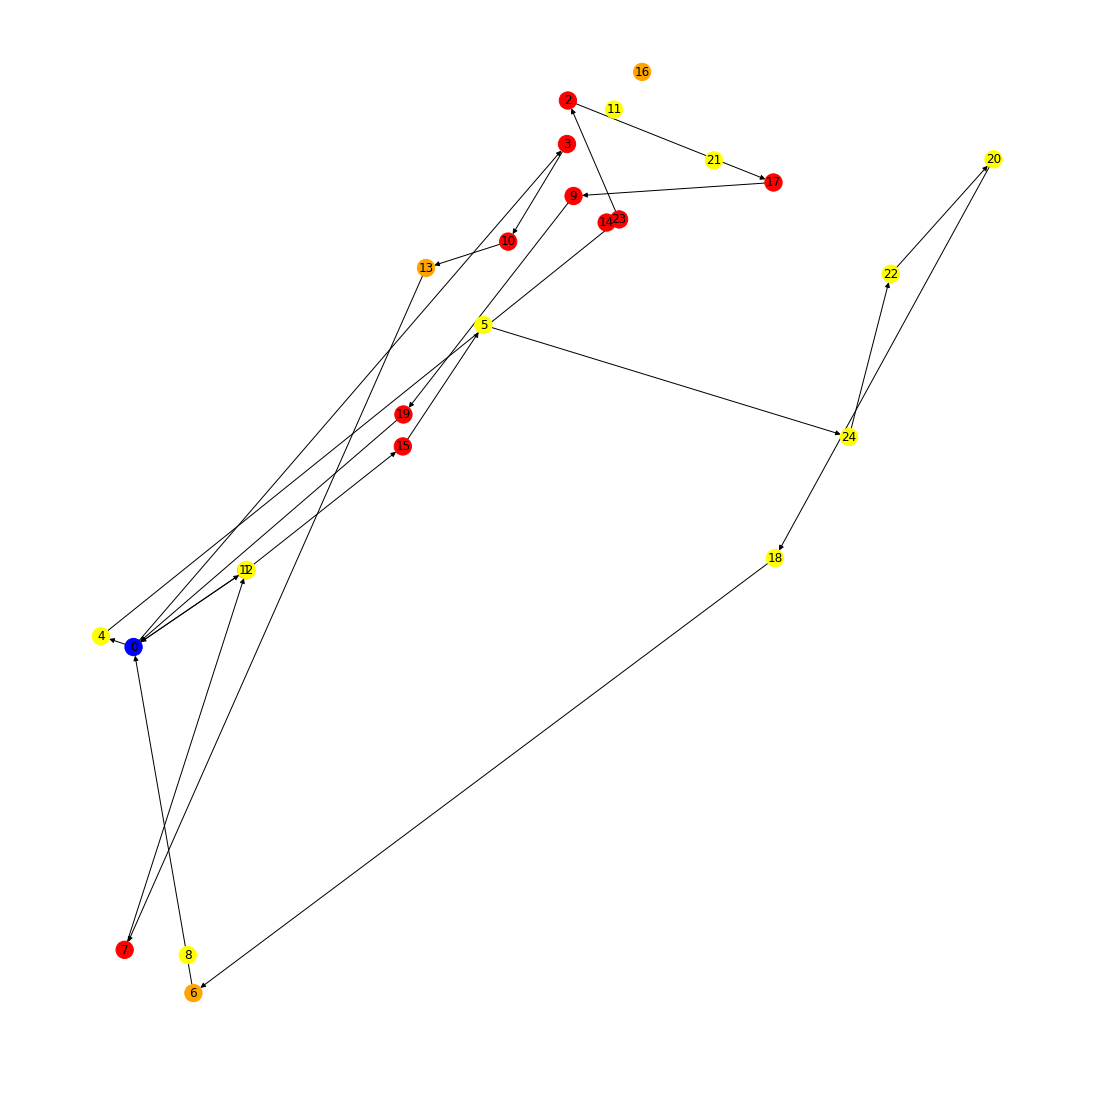

In [56]:
alns = ALNS()
alns.add_destroy_operator(tvrp.randomRemoval)
alns.add_destroy_operator(tvrp.distancedBasedWorstRemoval)
alns.add_destroy_operator(tvrp.timeBasedWorstRemoval)
alns.add_destroy_operator(tvrp.relatedRemoval)
alns.add_repair_operator(tvrp.greedyInsertion)
alns.add_repair_operator(tvrp.k_regretInsertion)
criterion = ThresholdAcceptance(0.25, 0.00025, 0.00025, method = "linear")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=1000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

In [64]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  1408.41998
Percent custs in holding after alns 0.20833333333333334


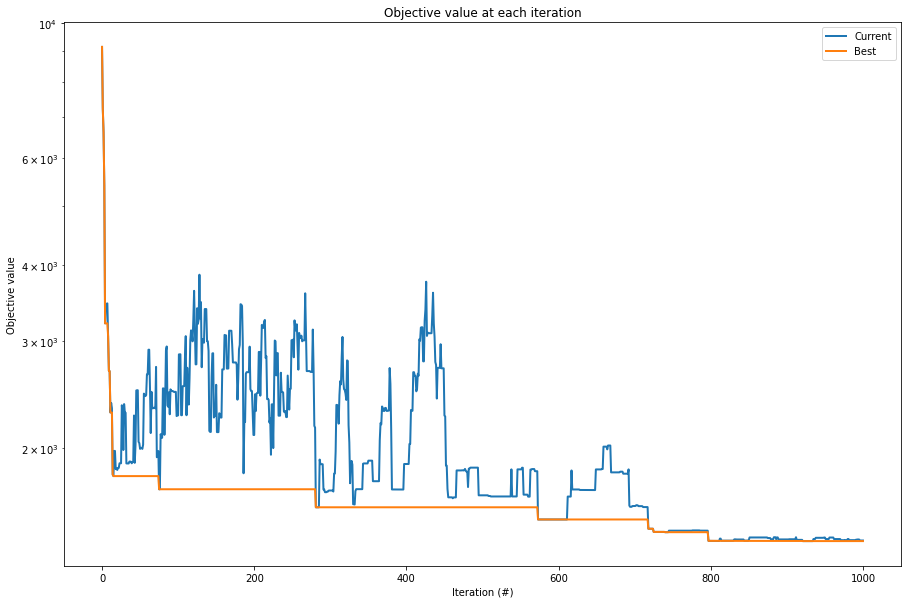

In [60]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

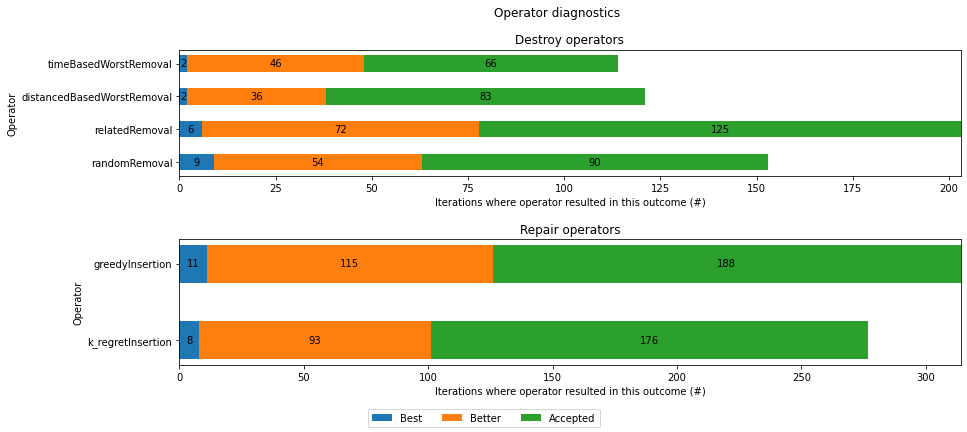

In [61]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])